In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/data_3_1_1.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]
y[y==0] = -1

x_train = x[:70]
y_train = y[:70]
x_test = x[70:]
y_test = y[70:]

print('x', x.shape)
print('y', y.shape)

x (100, 2)
y (100,)


In [ ]:
#Pytorch Module
import torch
import torch.nn as nn

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)

  def forward(self, x):
    """
    x: tensor(m, 2)
    return: tensor(m)
    """
    output = self.linear(x) #tensor(m, 1)
    #output = torch.sigmoid(output)
    return output.flatten()

tmp = torch.randn(100, 2)
model = MyModel()
output = model(tmp)

print('output', output.shape)

output torch.Size([100])


In [ ]:
#training
import torch.optim as optim

def hinge_loss(tz, ty):
  return torch.clamp(1-tz.flatten()*ty, min=0).mean()

model = MyModel()
opt = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.0001)

tx = torch.tensor(x_train, dtype=torch.float32)
ty = torch.tensor(y_train, dtype=torch.float32)

for i in range(1000):
  tz = model(tx)
  J = hinge_loss(tz, ty)

  if i%50==0:
    print('i: %d, J: %f' % (i, J.item()))

  J.backward()

  opt.step()
  opt.zero_grad()


i: 0, J: 2.911229
i: 50, J: 0.080472
i: 100, J: 0.077726
i: 150, J: 0.074680
i: 200, J: 0.073705
i: 250, J: 0.072718
i: 300, J: 0.071607
i: 350, J: 0.070406
i: 400, J: 0.069157
i: 450, J: 0.067985
i: 500, J: 0.067164
i: 550, J: 0.066456
i: 600, J: 0.065472
i: 650, J: 0.064390
i: 700, J: 0.063427
i: 750, J: 0.062566
i: 800, J: 0.062329
i: 850, J: 0.061931
i: 900, J: 0.061727
i: 950, J: 0.061446


In [ ]:
#evaluating the model
tx_test = torch.tensor(x_test, dtype=torch.float32)
ty_test = torch.tensor(y_test, dtype=torch.float32)

tz = model(tx_test)
tz[tz>=0] = 1
tz[tz<0] = -1
accuracy = (tz==ty_test).float().sum()/tx_test.shape[0]
print('Accuracy Rate: %.4f' % accuracy.item())


Accuracy Rate: 1.0000


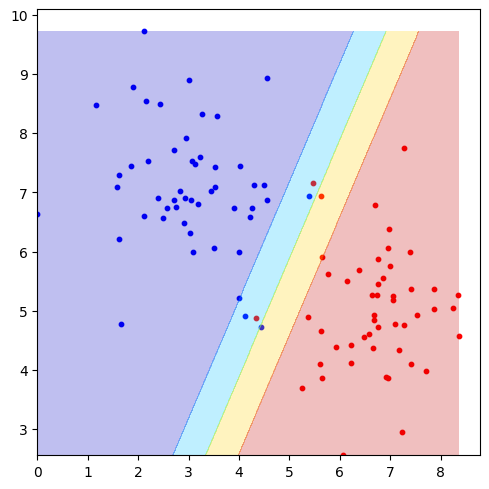

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
id0 = np.where(y==-1)
id1 = np.where(y==1)
plt.scatter(x=x[id0, 0], y=x[id0, 1], c="blue", s=10)
plt.scatter(x=x[id1, 0], y=x[id1, 1], c="red", s=10)

step = 0.01
xx = np.arange(x[:, 0].min(), x[:, 0].max(), step)
yy = np.arange(x[:, 1].min(), x[:, 1].max(), step)
xx, yy = np.meshgrid(xx, yy)
xy = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

z = model(torch.tensor(xy, dtype=torch.float32))
z = z.detach().numpy()

z[np.where(z > 1)] = 4
z[np.where((z > 0) & (z <= 1))] = 3
z[np.where((z > -1) & (z <= 0))] = 2
z[np.where(z <= -1)] = 1

plt.contourf(xx, yy, z.reshape(xx.shape), cmap=plt.cm.jet, alpha=0.25)
plt.tight_layout()
plt.show()